In [10]:
import torch 
import torchvision 
from torchvision import transforms, datasets
import matplotlib.pyplot as plt 
import torch.nn as nn 
import torch.nn.functional as F 

In [6]:
import os 
import cv2 
import numpy as np 
from tqdm import tqdm

REBUILD_DATA = False #This is True in the first run of class DogsVsCats and later on its false as this is for making train data

In [7]:
class DogsVsCats():
    IMG_SIZE = 50 #Resizing to 50*50
    CATS = '/home/manju838/coding/env/pytorch_env/Datasets/PetImages/Cat'
    DOGS = '/home/manju838/coding/env/pytorch_env/Datasets/PetImages/Dog'
    LABELS = {CATS:0,DOGS:1}
    training_data = []
    cat_count = 0
    dog_count = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.cat_count += 1
                    elif label == self.DOGS:
                        self.dog_count += 1
                except Exception as e:
                    pass
                    #print(str(e))
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ",self.cat_count)
        print("Dogs: ",self.dog_count)

if REBUILD_DATA:
    dogsvcats = DogsVsCats()
    dogsvcats.make_training_data()




100%|██████████| 12501/12501 [00:11<00:00, 1052.39it/s]
Cats:  12476
Dogs:  12470


In [8]:
training_data = np.load("training_data.npy",allow_pickle = True)

In [9]:
print(len(training_data))
print(training_data[1])

24946
[array([[ 23,  37,  27, ...,  44,  49,  43],
       [ 23,  36,  31, ...,  47,  49,  50],
       [ 21,  32,  32, ...,  50,  51,  50],
       ...,
       [ 31,  25,  21, ..., 255, 246, 252],
       [ 53,  31,  33, ..., 255, 246, 252],
       [ 56,  57,  26, ..., 255, 254, 248]], dtype=uint8)
 array([1., 0.])]


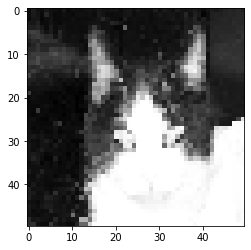

[1. 0.]


In [13]:
plt.imshow(training_data[1][0], cmap = "gray")
plt.show()
print(training_data[1][1])

Since the one hot vector is (1 , 0) this picture is a cat

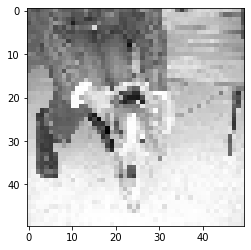

[0. 1.]


In [14]:
plt.imshow(training_data[0][0], cmap = "gray")
plt.show()
print(training_data[0][1])

This is a dog

In [23]:
print(len(training_data))#Total no. of images is 24946
print(training_data.shape) #Each of these records has two elements,one for feature(tensor representing pic) and the other 
print("This is the first record's image in pixels(0-255)")
print(training_data[0][0]) 
print("-----------------")
print("This is the first record's digit label's one hot vector")
print(training_data[0][1])#So this is a dog
print(training_data[0][0].shape) #Each record is a 50*50 pixel image(as specified by IMG_SIZE)
print(training_data[0][1].shape) #The second element of record is an array of size 2 = No.of one hot vector encodings(no.of classes here Dog and Cat)
print(training_data[24945][0].shape) #Since total no.of images is 24946,the last one is 24945 and 24946 gives index out of bounds error 
print(training_data[24946][0].shape)

24946
(24946, 2)
This is the first record's image in pixels(0-255)
[[128 111 102 ... 201 197 122]
 [123 129 119 ... 140 143 107]
 [118 133 120 ... 184 178 105]
 ...
 [237 245 247 ... 242 243 236]
 [235 243 247 ... 243 243 233]
 [235 248 249 ... 239 238 232]]
-----------------
This is the first record's digit label's one hot vector
[0. 1.]
(50, 50)
(2,)
(50, 50)


IndexError: index 24946 is out of bounds for axis 0 with size 24946

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.conv1 = nn.Conv2d(1, 32, 5) #Input Channel is one as its Grayscale image,32 layers for recognising pattern,for RGB image,channel is 3
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
#Here 32 layers in conv1 means to detect the features of cats an dogs,we use different features.Eg,for dog we have an elongated mouth while its not the case for a cat.So if I use a layer to detect that feature then it becomes one of the layers in the initial 32 layers.
#Kernel size is written as a single number if the kernel is a squared one(here 5*5) but if it is a rectangular one we use a tuple to denote it
        x = torch.rand(50,50).view(-1,1,50,50) # Each of these images are of shape(1,50,50),1 is for Grayscale channel is 1,(50,50) image pixels,and -1 is to automatically take no.of records or images
        self._to_linear_ = None
        self.convs(x)

        #self.fc1 = nn.Linear(???????, 512)
        #self.fc2 = nn.Linear(512, 2) #2 classes(Dog and Cat)

    def convs(self, x):
        
